#### Building a WordPiece Tokenizer from Scratch

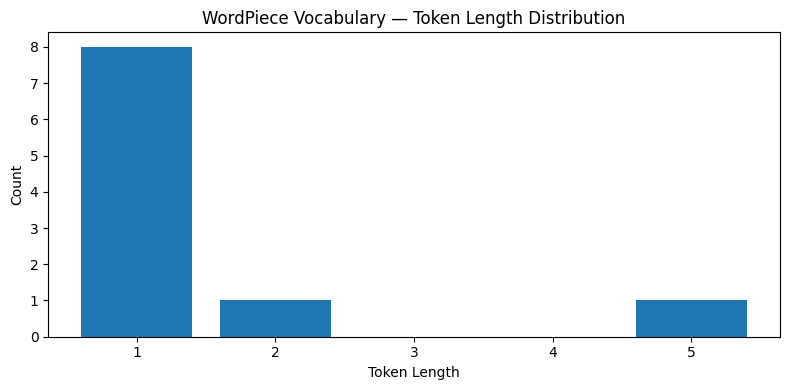

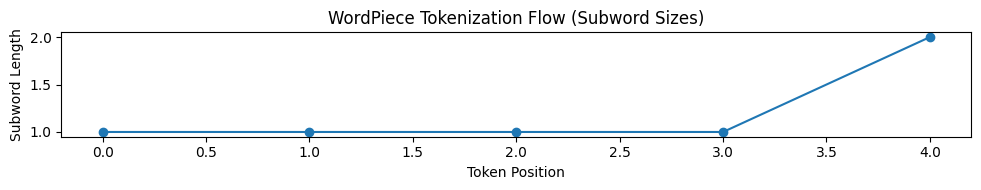

Sample Word: lowest
WordPiece Tokens: ['l', '##o', '##w', '##e', '##st']
Vocabulary Size: 10


In [ ]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import math

corpus = [
    "low lower lowest",
    "newer newer newest",
    "low newest lower"
]

def initialize_vocab(corpus):
    vocab = set()
    word_freq = Counter()

    for sentence in corpus:
        for word in sentence.split():
            word_freq[word] += 1
            vocab.add(word[0])
            for ch in word[1:]:
                vocab.add("##" + ch)

    vocab.add("<UNK>")
    return vocab, word_freq

vocab, word_freq = initialize_vocab(corpus)

def train_wordpiece(word_freq, vocab, max_vocab_size=30):
    for _ in range(max_vocab_size):
        pair_counts = defaultdict(int)
        token_counts = defaultdict(int)

        for word, freq in word_freq.items():
            tokens = [word[0]] + ["##" + c for c in word[1:]]

            for t in tokens:
                token_counts[t] += freq

            for i in range(len(tokens) - 1):
                pair_counts[(tokens[i], tokens[i + 1])] += freq

        if not pair_counts:
            break

        scores = {}
        for (a, b), freq in pair_counts.items():
            scores[(a, b)] = freq / (token_counts[a] * token_counts[b])

        best_pair = max(scores, key=scores.get)
        merged_token = best_pair[0] + best_pair[1].replace("##", "")

        if merged_token in vocab:
            break

        vocab.add(merged_token)

    return vocab



vocab = train_wordpiece(word_freq, vocab)

def wordpiece_tokenize(word, vocab):
    tokens = []
    i = 0

    while i < len(word):
        match = None
        for j in range(len(word), i, -1):
            sub = word[i:j]
            if i > 0:
                sub = "##" + sub
            if sub in vocab:
                match = sub
                break

        if match is None:
            tokens.append("<UNK>")
            break

        tokens.append(match)
        i = j

    return tokens

sample_word = "lowest"
tokenized = wordpiece_tokenize(sample_word, vocab)

token_lengths = Counter(len(token.replace("##", "")) for token in vocab)

plt.figure(figsize=(8, 4))
plt.bar(token_lengths.keys(), token_lengths.values())
plt.title("WordPiece Vocabulary — Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

subword_lengths = [len(t.replace("##", "")) for t in tokenized]

plt.figure(figsize=(10, 2))
plt.plot(range(len(tokenized)), subword_lengths, marker="o")
plt.title("WordPiece Tokenization Flow (Subword Sizes)")
plt.xlabel("Token Position")
plt.ylabel("Subword Length")
plt.tight_layout()
plt.show()

print("Sample Word:", sample_word)
print("WordPiece Tokens:", tokenized)
print("Vocabulary Size:", len(vocab))